# Script Uso Endpoint


## Modelagem Categrização Reclamações:


1.   Upload da base na Azure marcando as colunas utilizadas.
2.   Foi utilizado o autoML do Azure.
3.   Deploy do modelo com melhor performance.
4.   Utilizado a chave do deploy para utilizar o modelo em tempo real, por este Script .


## Modelo Final estará na pasta do projeto.


# Performance Modelo e evidência modelo:
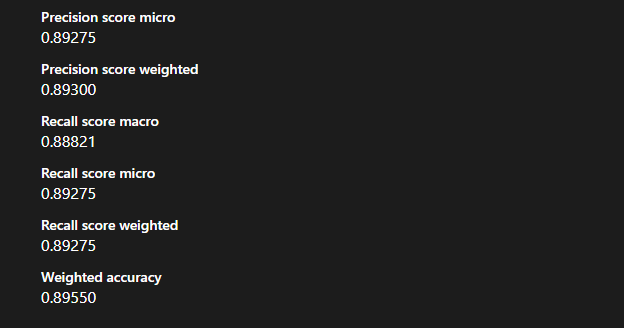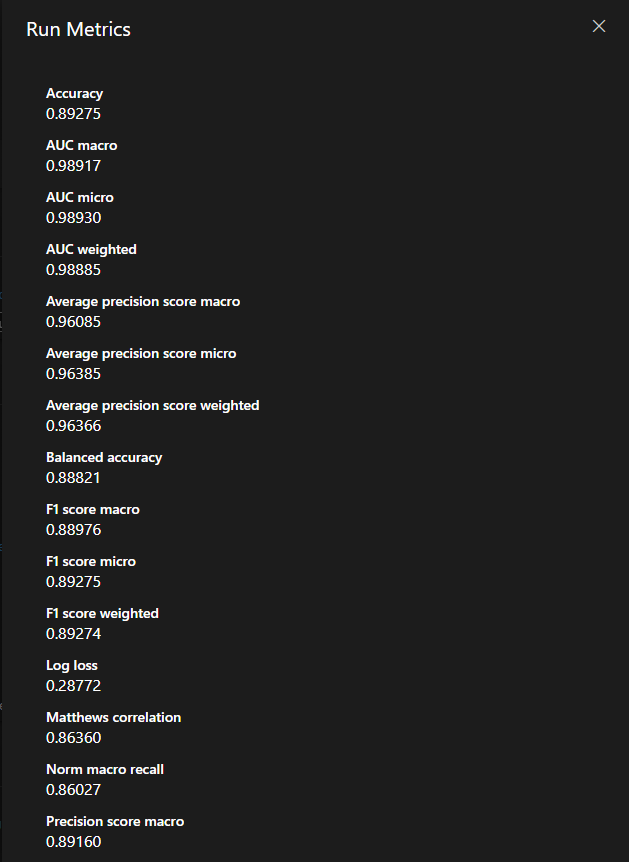








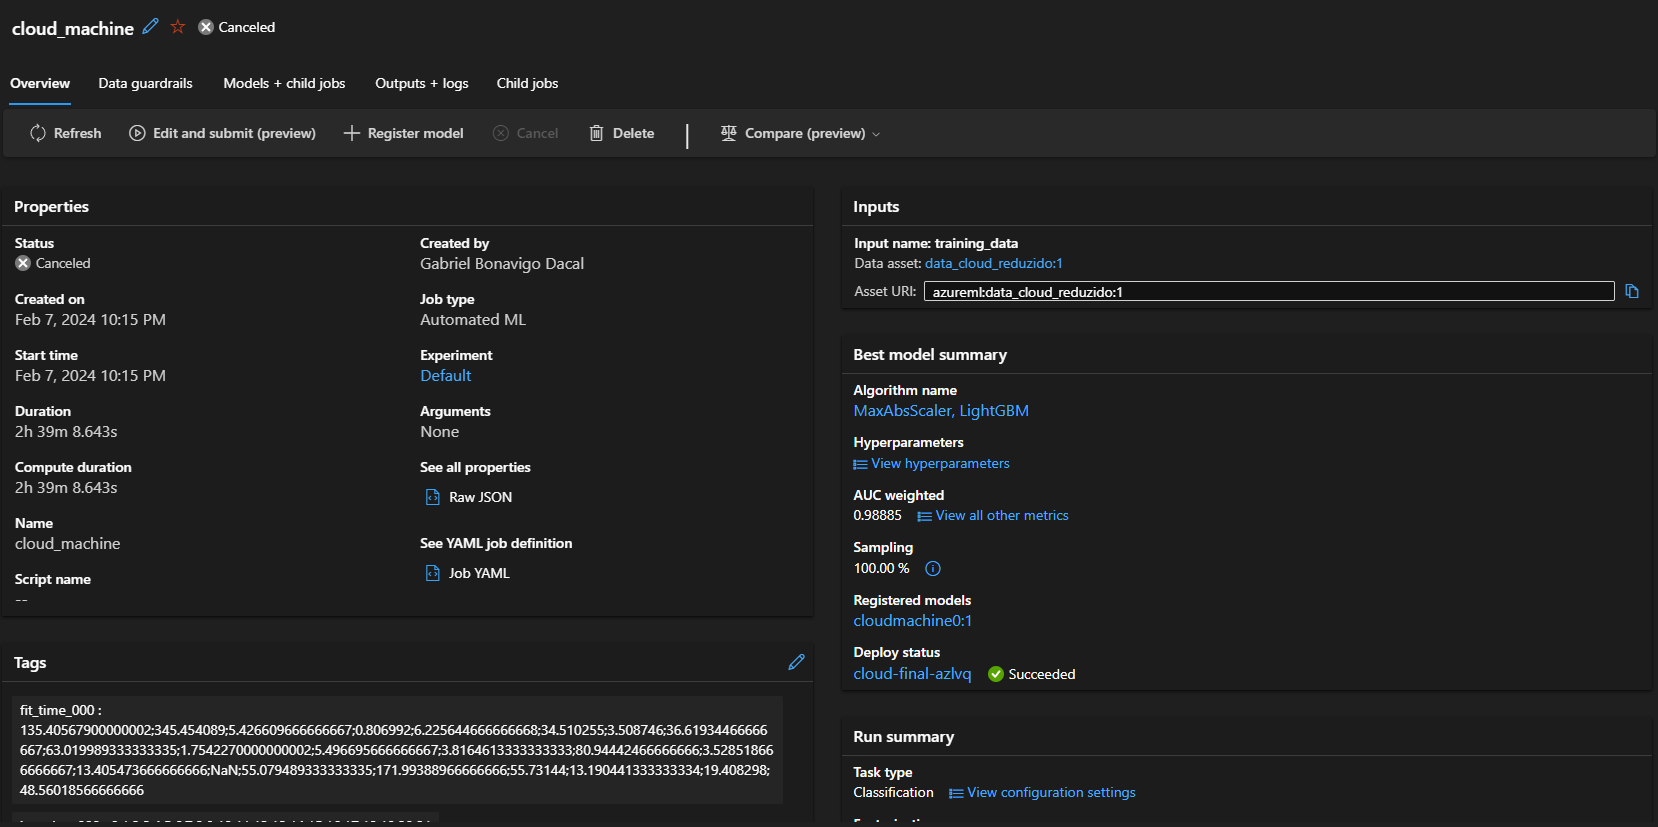

In [ ]:
import urllib.request
import json
import os
import ssl
import codecs
def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script



In [ ]:
data =  {
  "input_data": {
    "columns": [
      "descricao_reclamacao"
    ],
    "index": [1,2],
    "data": ["Estou com problemas no meu cartão","Não estou conseguindo acessar minha conta"]
  }
}

body = str.encode(json.dumps(data))

url = 'https://cloud-final-azlvq.centralus.inference.ml.azure.com/score'
# Replace this with the primary/secondary key or AMLToken for the endpoint
api_key = 'boz3JlOWKhSjtmOIbXefJGcVv78CVS5g'
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'cloudmachine0-1' }

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print( codecs.decode(result.decode('utf-8'), 'unicode_escape'))
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

["Cartão de crédito / Cartão pré-pago", "Serviços de conta bancária"]
